In [1]:
import sys
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, make_scorer
from imblearn.over_sampling import RandomOverSampler
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering


#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sys.path.insert(0, '/Users/gracewang/Documents/GitHub/elecfinal')
sys.path.insert(0, 'D:\Fall23 Coursework\ELEC478\Competition\elecfinal')

In [2]:
from ml_pipeline_grace import train_n_predict, validation, clean_split

In [3]:
from Data.data_cleaner import cleaner

In [4]:
## Clean data
train_path = "../Data/train_data.csv"
feature_path = "../Data/feature_weights.csv"
morph_path = "../Data/imputed_morph_embed.csv"
X_train, X_val, X_query, y_train, y_val, y_query = clean_split(train_path, feature_path, morph_path)

In [5]:
X_train.columns

Index(['ID', 'adp_dist', 'post_skeletal_distance_to_soma',
       'pre_skeletal_distance_to_soma', 'pre_oracle', 'pre_test_score',
       'post_oracle', 'post_test_score', 'compartment', 'pre_brain_area',
       'post_brain_area', 'post_nucleus_x', 'post_nucleus_y', 'post_nucleus_z',
       'pre_nucleus_id', 'post_nucleus_id', 'pre_feature_weights',
       'post_feature_weights', 'pre_morph_embeddings', 'post_morph_embeddings',
       'me_similarity', 'fw_similarity', 'projection_group', 'axonal_coords',
       'dendritic_coords', 'pre_rf_coords', 'post_rf_coords',
       'pre_nucleus_coords', 'nuclei_adp_dist'],
      dtype='object')

# Select Feature Weights

In [10]:
feature_weights = pd.read_csv(feature_path)
X_train_fw = feature_weights.merge(X_train['pre_nucleus_id'], right_on ='pre_nucleus_id', left_on='nucleus_id')

In [11]:
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict

feature_counts = defaultdict(int)
for rep in range(50):
    model = RandomForestClassifier(n_estimators=500)

    model.fit(X_train_fw.drop(columns=['pre_nucleus_id', 'nucleus_id']), y_train)

    importances = model.feature_importances_
    imp_df = pd.DataFrame({"Features":X_train_fw.drop(columns=['pre_nucleus_id', 'nucleus_id']).columns, "Importance":importances})

    imp_df = imp_df.sort_values('Importance', ascending=False)
    for feature in imp_df['Features'][0:5]:
        feature_counts[feature]+=1

KeyboardInterrupt: 

In [12]:
feature_counts

defaultdict(int, {})

In [13]:
keep_fw = feature_weights[["nucleus_id", "feature_weight_330", 'feature_weight_328']]
X_train = keep_fw.merge(X_train, left_on='nucleus_id', right_on='pre_nucleus_id')
X_train

,nucleus_id,feature_weight_330,feature_weight_328,ID,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,pre_oracle,pre_test_score,post_oracle,...,post_morph_embeddings,me_similarity,fw_similarity,projection_group,axonal_coords,dendritic_coords,pre_rf_coords,post_rf_coords,pre_nucleus_coords,nuclei_adp_dist
0,557121,-0.194537,0.231414,42593,-1.515697,2.007164,0.931055,0.037561,0.787980,1.191761,...,"[1.0723994970321655, -0.7540942430496216, 0.11...",-0.934986,-0.182150,RL->RL,"[1187660, 411978, 1089020]","[1187390, 412220, 1089160]","[882.7244675159454, 519.1477453708649]","[858.5207009315491, 608.4342455863953]","[1283392, 621504, 1020280]",0.076496
1,557121,-0.194537,0.231414,42594,-1.225578,1.070301,0.268030,0.037561,0.787980,1.191761,...,"[1.0723994970321655, -0.7540942430496216, 0.11...",-0.934986,-0.182150,RL->RL,"[1204580, 682542, 873138]","[1204640, 682870, 873890]","[882.7244675159454, 519.1477453708649]","[858.5207009315491, 608.4342455863953]","[1283392, 621504, 1020280]",-0.306546
2,557121,-0.194537,0.231414,42595,0.632301,2.099967,0.905442,0.037561,0.787980,1.191761,...,"[1.0723994970321655, -0.7540942430496216, 0.11...",-0.934986,-0.182150,RL->RL,"[1191790, 403683, 1093180]","[1188590, 402414, 1092660]","[882.7244675159454, 519.1477453708649]","[858.5207009315491, 608.4342455863953]","[1283392, 621504, 1020280]",0.118612
3,557121,-0.194537,0.231414,42596,0.645635,1.931656,0.956222,0.037561,0.787980,1.191761,...,"[1.0723994970321655, -0.7540942430496216, 0.11...",-0.934986,-0.182150,RL->RL,"[1184320, 419286, 1082930]","[1186620, 419721, 1085540]","[882.7244675159454, 519.1477453708649]","[858.5207009315491, 608.4342455863953]","[1283392, 621504, 1020280]",0.035778
4,557121,-0.194537,0.231414,42597,1.334344,1.668055,-0.042977,0.037561,0.787980,1.191761,...,"[1.0723994970321655, -0.7540942430496216, 0.11...",-0.934986,-0.182150,RL->RL,"[1189150, 673302, 944202]","[1188790, 677771, 942901]","[882.7244675159454, 519.1477453708649]","[858.5207009315491, 608.4342455863953]","[1283392, 621504, 1020280]",-0.587712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116272,294858,-0.383717,-0.206139,224656,-1.153476,0.399766,-0.718692,0.577790,-0.460852,-0.024162,...,"[1.4674314260482788, 0.6272068619728088, 0.410...",0.278531,-0.033703,V1->V1,"[815199, 840966, 936012]","[815423, 841222, 936912]","[831.2186741828918, 560.7675075531006]","[894.7975826263428, 590.8018326759338]","[770240, 531136, 920360]",0.523107
116273,294858,-0.383717,-0.206139,224657,-0.241583,-0.349050,-1.047622,0.577790,-0.460852,-0.024162,...,"[1.4674314260482788, 0.6272068619728088, 0.410...",0.278531,-0.033703,V1->V1,"[781179, 711648, 913773]","[781156, 713918, 914591]","[831.2186741828918, 560.7675075531006]","[894.7975826263428, 590.8018326759338]","[770240, 531136, 920360]",-0.286781
116274,294858,-0.383717,-0.206139,224658,0.554607,-0.541337,-0.882155,0.577790,-0.460852,-0.024162,...,"[1.4674314260482788, 0.6272068619728088, 0.410...",0.278531,-0.033703,V1->V1,"[792729, 700644, 853209]","[796175, 699876, 854748]","[831.2186741828918, 560.7675075531006]","[894.7975826263428, 590.8018326759338]","[770240, 531136, 920360]",-0.270014
116275,294858,-0.383717,-0.206139,224659,1.086661,-0.653431,-0.854285,0.577790,-0.460852,-0.024162,...,"[1.4674314260482788, 0.6272068619728088, 0.410...",0.278531,-0.033703,V1->V1,"[790671, 741048, 834960]","[789421, 744192, 837710]","[831.2186741828918, 560.7675075531006]","[894.7975826263428, 590.8018326759338]","[770240, 531136, 920360]",-0.002103


## One-Hot Encoding of Compartment

In [14]:
# different compartments
pd.unique(X_train["compartment"])

array(['axon', 'oblique', 'apical', 'basal', 'soma', 'apical_tuft',
       'apical_shaft'], dtype=object)

In [15]:
area1 = ["basal", "soma"]
area2 = ["axon", "apical", "oblique", "apical_shaft"]
area3 = ["apical_tuft"]

def area_cols(df):
    df["area1"] = df["compartment"].isin(area1).astype('int')
    df["area2"] = df["compartment"].isin(area2).astype('int')
    df["area3"] = df["compartment"].isin(area3).astype('int')
    return df


In [16]:
X_train = area_cols(X_train)
X_val = area_cols(X_val)
X_query = area_cols(X_query)

# Clustering
Create clusters?

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='post_nucleus_x', ylabel='post_nucleus_y'>

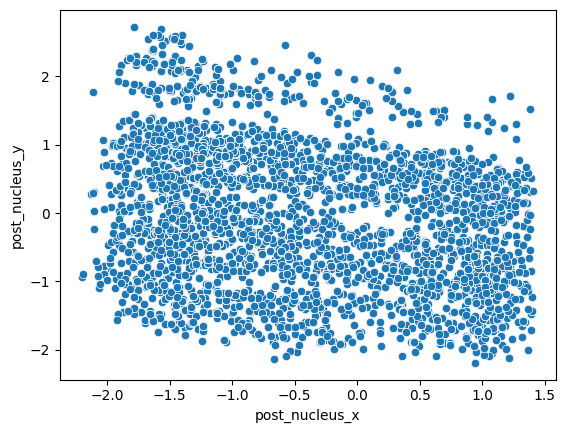

In [9]:
sns.scatterplot(x=X_train['post_nucleus_x'], y=X_train['post_nucleus_y'])

In [20]:
clustering = SpectralClustering(n_clusters= 4, assign_labels='kmeans', affinity = 'nearest_neighbors').fit(X_train[["post_nucleus_x", "post_nucleus_y"]])
X_train["cluster"] = clustering.fit_predict(X_train[["post_nucleus_x", "post_nucleus_y"]])
sns.scatterplot(data=X_train, x="post_nucleus_x", y="post_nucleus_y", hue="cluster")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

# Validation

In [20]:
X_val = keep_fw.merge(X_val, left_on='nucleus_id', right_on='pre_nucleus_id')

valid_X = X_val.select_dtypes(include='number').drop(["ID","pre_nucleus_id", "post_nucleus_id"], axis = 1)

valid_y = y_val

train_X = X_train.select_dtypes(include='number').drop(["ID", "pre_nucleus_id", "post_nucleus_id"], axis = 1)
train_y = y_train

In [21]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116277 entries, 0 to 116276
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   nucleus_id                      116277 non-null  int64  
 1   feature_weight_330              116277 non-null  float64
 2   feature_weight_328              116277 non-null  float64
 3   adp_dist                        116277 non-null  float64
 4   post_skeletal_distance_to_soma  116277 non-null  float64
 5   pre_skeletal_distance_to_soma   116277 non-null  float64
 6   pre_oracle                      116277 non-null  float64
 7   pre_test_score                  116277 non-null  float64
 8   post_oracle                     116277 non-null  float64
 9   post_test_score                 116277 non-null  float64
 10  post_nucleus_x                  116277 non-null  float64
 11  post_nucleus_y                  116277 non-null  float64
 12  post_nucleus_z  

Using Validation

In [22]:
"""
    Function that outputs a model with optimal hyperparameters
    based on a validation set using grid search

    Inputs:
    model: provided model
    param_grid: dictionary of parameters and values to validate on
    e.g. 
    {'C': [0.001,0.01,0.1,1,10], 
    'gamma':[0.1,1,10,100], 
    'kernel':('linear', 'rbf')}
    valid_X: validation X of data (pandas df)
    valid_y: validation y of data

    Outputs: 
    clf: provided model with optimum hyperparameters
    """
pre_valid_models = [RandomForestClassifier(), LinearDiscriminantAnalysis()]
param_grids = [
    {
    'max_features' : ['sqrt', 'log2'],
    'n_jobs' : [-1],
    'random_state': [1],
    'n_estimators':[25, 100, 250, 500],
    'max_depth': [25, 50, 100]
    },
    {
    'solver' : ['lsqr', 'eigen'],
    'shrinkage' : ['auto']
    }]
post_valid_models = []

for i in range(len(pre_valid_models)):
    best_clf = validation(model = pre_valid_models[i], 
                                        param_grid = param_grids[i], 
                                        valid_X = train_X, 
                                        valid_y = train_y)
    post_valid_models.append(best_clf)


In [50]:
rf = post_valid_models[0]
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

(Alternative validation) USING ALL SVDs

In [56]:
pre_valid_models = [SVC()]
param_grids = [
    {
    'kernel':['rbf'],
    'C': [0.1, 1],
    }]
post_valid_models = []

for i in range(len(pre_valid_models)):
    best_clf = validation(model = pre_valid_models[i], 
                                        param_grid = param_grids[i], 
                                        valid_X = valid_X, 
                                        valid_y = valid_y)
    post_valid_models.append(best_clf)

KeyboardInterrupt: 

# Training and Predicting

In [51]:
X_query = keep_fw.merge(X_query, left_on='nucleus_id', right_on='pre_nucleus_id')

query_X = X_query.select_dtypes(include='number').drop(["ID", "pre_nucleus_id", "post_nucleus_id"], axis = 1)
query_y = y_query

train_X = X_train.select_dtypes(include='number').drop(["ID", "pre_nucleus_id", "post_nucleus_id"], axis = 1)
train_y = y_train

In [52]:
"""
    Function that takes in a dataframe of data and outputs 
    a fitted "optimal" model

    Inputs:
    - train: training set
    - query: query set
    - models: dictionary of (model_name : model function) to train and predict on, with optimized 
    parameters already.

    Outputs:
    - best_clf: The optimum classifier function fitted over training data

    - accuracy_score: list of accuracies based on order of models
    passed.
    """
##Change this according to the models you passed for validation
models = {"RFC": post_valid_models[0], "LDA": post_valid_models[1]}
accuracy_score, best_clf, trained_models = train_n_predict(train_X, train_y, query_X, query_y, models)

In [53]:
trained_models["RFC"]

RandomForestClassifier(max_depth=25, n_estimators=500, n_jobs=-1,
                       random_state=1)

In [54]:
print("The accuracies are", accuracy_score)

The accuracies are {'RFC': 0.4997164019751768, 'LDA': 0.7530805550672551}


In [55]:
leaderboard_path = "../Data/leaderboard_data.csv"
sub_data = cleaner(leaderboard_path, feature_path, morph_path, submission = True)
sub_data = area_cols(sub_data)
sub_data = keep_fw.merge(sub_data, left_on='nucleus_id', right_on='pre_nucleus_id')

sub_data.columns

Index(['nucleus_id', 'feature_weight_330', 'feature_weight_328', 'ID',
       'adp_dist', 'post_skeletal_distance_to_soma',
       'pre_skeletal_distance_to_soma', 'pre_oracle', 'pre_test_score',
       'post_oracle', 'post_test_score', 'compartment', 'pre_brain_area',
       'post_brain_area', 'post_nucleus_x', 'post_nucleus_y', 'post_nucleus_z',
       'pre_nucleus_id', 'post_nucleus_id', 'pre_feature_weights',
       'post_feature_weights', 'pre_morph_embeddings', 'post_morph_embeddings',
       'me_similarity', 'fw_similarity', 'projection_group', 'axonal_coords',
       'dendritic_coords', 'pre_rf_coords', 'post_rf_coords',
       'pre_nucleus_coords', 'nuclei_adp_dist', 'area1', 'area2', 'area3'],
      dtype='object')

In [56]:
lb_data = sub_data.select_dtypes(include='number').drop(["pre_nucleus_id", "post_nucleus_id"], axis = 1)
lb_data.columns

Index(['nucleus_id', 'feature_weight_330', 'feature_weight_328', 'ID',
       'adp_dist', 'post_skeletal_distance_to_soma',
       'pre_skeletal_distance_to_soma', 'pre_oracle', 'pre_test_score',
       'post_oracle', 'post_test_score', 'post_nucleus_x', 'post_nucleus_y',
       'post_nucleus_z', 'me_similarity', 'fw_similarity', 'nuclei_adp_dist',
       'area1', 'area2', 'area3'],
      dtype='object')

In [57]:
#create a boolean prediction solution
lb_data["connected"] = trained_models["LDA"].predict(lb_data.drop("ID", axis = 1))

In [58]:
submission_data = lb_data.filter(['ID','connected'])

In [59]:
submission_data.to_csv('submission_data.csv',index=False)